## Sprawozdanie5

**Data:** 2024-06-04
**Autor:** Piotr Szepietowski

Wykorzystywane dalej biblioteki zewnętrzne Pythona
- matplotlib
- numpy

### Metoda Gradientowa

Metoda gradientowa (gradient descent) to iteracyjny algorytm służący do rozwiązywania układów równań liniowych postaci \( Ax = b \), gdzie \( A \) jest macierzą symetryczną i dodatnio określoną. 

Podstawowa idea polega na minimalizacji funkcji celu:
$$
f(x) = \frac{1}{2} x^T A x - b^T x
$$
W każdej iteracji wyznaczany jest kierunek największego spadku (gradient), a następnie wykonywany jest krok w tym kierunku z odpowiednio dobraną długością (parametrem \(\alpha\)). Algorytm powtarza te kroki aż do osiągnięcia zadanej dokładności (norma residuum poniżej tolerancji).

**Schemat algorytmu:**
1. Inicjalizacja punktu startowego $$ x_0 $$ (np. wektor zerowy).
2. Obliczenie residuum $$ r = b - Ax $$
3. Dopóki norma residuum jest większa od tolerancji:
    - Wyznacz kierunek $$ w = r $$
    - Oblicz krok $$alpha = \frac{r^T w}{w^T A w}$$
    - Zaktualizuj rozwiązanie $$ x = x + \alpha w $$
    - Zaktualizuj residuum $$ r = b - Ax $$

Metoda ta jest szczególnie efektywna dla dużych, rzadkich układów równań, gdzie bezpośrednie metody (np. eliminacja Gaussa) są zbyt kosztowne obliczeniowo.


---
### Dane wejściowe z polecenia

Macierz współczynników \( A \) oraz wektor wyrazów wolnych \( b \):

$$
A = \begin{bmatrix}
4 & 2 & -1 \\
2 & 5 & 2 \\
-1 & 2 & 10
\end{bmatrix}
\qquad
b = \begin{bmatrix}
12 \\
-8 \\
4
\end{bmatrix}
$$


In [66]:
import numpy as np

def gradient(A, b, x0=None, tol=1e-10, max_iter=1000):
    A = np.array(A)
    b = np.array(b)
    n = len(b)
    if x0 is None:
        x = np.zeros(n)
    else:
        x = np.array(x0)
    
    r = b - A @ x
    w = r.copy()  # pierwszy kierunek = gradient
    
    for _ in range(max_iter):
        if np.linalg.norm(r) < tol:
            break
            
        z = A @ w
        alpha = (r @ r) / (w @ z)
        x = x + alpha * w
        r_new = r - alpha * z
        
        beta = (r_new @ r_new) / (r @ r)  # wzór Fletcher-Reeves
        w = r_new + beta * w  # kluczowa różnica!
        
        r = r_new
    
    return x



A = np.array([[4,2,-1],[2,5,2],[-1,2,10]] )
b = np.array([12, -8, 4])
print(f"Wynik dla A = {A} i b = {b} to {gradient(A,b)}")

x0 = np.ones_like(b)
print(f"Wynik dla x0 = {x0}: {gradient(A, b, x0=x0)}")

Wynik dla A = [[ 4  2 -1]
 [ 2  5  2]
 [-1  2 10]] i b = [12 -8  4] to [ 5.83206107 -4.70229008  1.92366412]
Wynik dla x0 = [1 1 1]: [ 5.83206107 -4.70229008  1.92366412]


  
Powyżej przedstawiono przykładowe wywołania funkcji `gradient` z różnymi punktami startowymi `x0`. Niezależnie od wyboru punktu startowego, metoda gradientowa znajduje poprawne rozwiązanie układu równań (o ile macierz \(A\) jest symetryczna i dodatnio określona). Zmiana `x0` wpływa jedynie na liczbę iteracji potrzebnych do osiągnięcia rozwiązania, ale nie na sam wynik końcowy.
Wyniki dla różnych `x0` są zgodne z rozwiązaniem uzyskanym metodą bezpośrednią (`np.linalg.solve`).  
Odpowiedni dobór punktu startowego może przyspieszyć zbieżność, ale nie wpływa na poprawność rozwiązania.

### Test poprawności rozwiązań względem funkcji wbudowanych

In [67]:
test_cases = [
    # 2x2
    {
        "A": np.array([[3, 1], [1, 2]]),
        "b": np.array([9, 8]),
        "desc": "2x2 układ"
    },
    # 3x3 (oryginalny)
    {
        "A": A,
        "b": b,
        "desc": "3x3 układ (oryginalny)"
    },
    # 4x4
    {
        "A": np.array([[10, 2, 0, 0], [2, 10, 2, 0], [0, 2, 10, 2], [0, 0, 2, 10]]),
        "b": np.array([12, 14, 14, 12]),
        "desc": "4x4 układ"
    }
]

for case in test_cases:
    x_grad = gradient(case["A"], case["b"])
    x_np = np.linalg.solve(case["A"], case["b"])
    print(f"{case['desc']}:")
    print("Rozwiązanie gradientowe:", x_grad)
    print("Rozwiązanie numpy.linalg.solve:", x_np)
    print("Czy zgodne (allclose)?", np.allclose(x_grad, x_np))
    print("-" * 40)

2x2 układ:
Rozwiązanie gradientowe: [2. 3.]
Rozwiązanie numpy.linalg.solve: [2. 3.]
Czy zgodne (allclose)? True
----------------------------------------
3x3 układ (oryginalny):
Rozwiązanie gradientowe: [ 5.83206107 -4.70229008  1.92366412]
Rozwiązanie numpy.linalg.solve: [ 5.83206107 -4.70229008  1.92366412]
Czy zgodne (allclose)? True
----------------------------------------
4x4 układ:
Rozwiązanie gradientowe: [1. 1. 1. 1.]
Rozwiązanie numpy.linalg.solve: [1. 1. 1. 1.]
Czy zgodne (allclose)? True
----------------------------------------


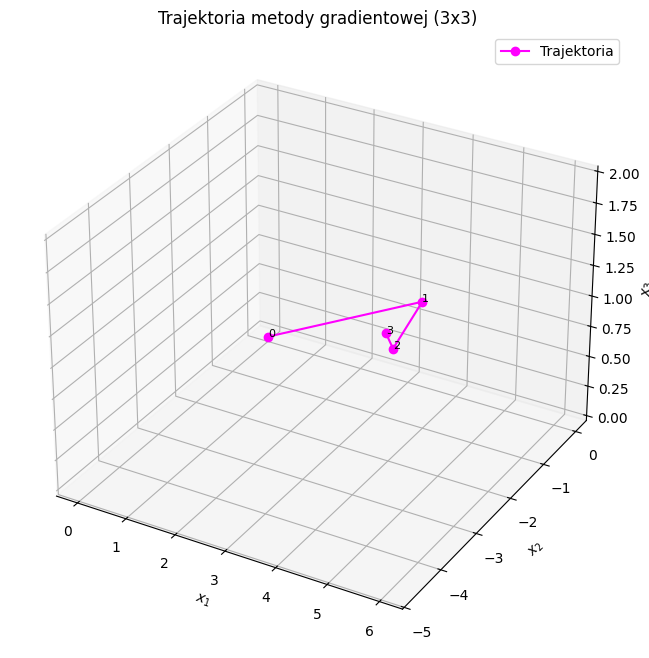

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gradient_trace_3d(A, b, x0=None, tol=1e-10, max_iter=1000):
    A = np.array(A)
    b = np.array(b)
    n = len(b)
    if x0 is None:
        x = np.zeros(n)
    else:
        x = np.array(x0)
    
    r = b - A @ x
    w = r.copy()
    trace = [x.copy()]
    
    for _ in range(max_iter):
        if np.linalg.norm(r) < tol:
            break
            
        z = A @ w
        denom = w @ z
        if abs(denom) < 1e-15:
            break
            
        alpha = (r @ r) / denom
        x = x + alpha * w
        r_new = r - alpha * z
        r_norm_old = r @ r
        r_norm_new = r_new @ r_new
        
        if r_norm_old < 1e-15:
            break
            
        beta = r_norm_new / r_norm_old
        w = r_new + beta * w 
        
        r = r_new
        trace.append(x.copy())
    
    return np.array(trace)

def plot3d(A, b):
    trace3d = gradient_trace_3d(A, b)

    n = A.shape[0]
    if n == 2:
        # 2D case: plot surface and trajectory in 3D
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        try:
            X1, X2
        except NameError:
            x1 = np.linspace(-2, 2, 40)
            x2 = np.linspace(-2, 2, 40)
            X1, X2 = np.meshgrid(x1, x2)

        Z = np.zeros_like(X1)
        for i in range(X1.shape[0]):
            for j in range(X1.shape[1]):
                x_vec = np.array([X1[i, j], X2[i, j]])
                Z[i, j] = np.linalg.norm(b - A @ x_vec)

        ax.plot_surface(X1, X2, Z, cmap='jet', alpha=0.5)
        residuals = np.linalg.norm(b - (A @ trace3d.T).T, axis=1)
        ax.plot(trace3d[:, 0], trace3d[:, 1], residuals, 
            marker='o', color='magenta', label='Trajektoria')

        for i, (x, y, z) in enumerate(zip(trace3d[:, 0], trace3d[:, 1], residuals)):
            ax.text(x, y, z, str(i), fontsize=8)

        ax.set_xlabel('$x_1$')
        ax.set_ylabel('$x_2$')
        ax.set_zlabel('$||r||$')
        ax.set_title('Trajektoria metody gradientowej (2x2)')
        ax.legend()
        plt.show()
    elif n == 3:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        residuals = np.linalg.norm(b - (A @ trace3d.T).T, axis=1)
        ax.plot(trace3d[:, 0], trace3d[:, 1], trace3d[:, 2], 
            marker='o', color='magenta', label='Trajektoria')

        for i, (x, y, z) in enumerate(trace3d):
            ax.text(x, y, z, str(i), fontsize=8)

        ax.set_xlabel('$x_1$')
        ax.set_ylabel('$x_2$')
        ax.set_zlabel('$x_3$')
        ax.set_title('Trajektoria metody gradientowej (3x3)')
        ax.legend()
        plt.show()
    else:
        raise ValueError("This plot3d implementation supports only 2D or 3D systems (A.shape[0]==2 or 3)")

plot3d(A, b)

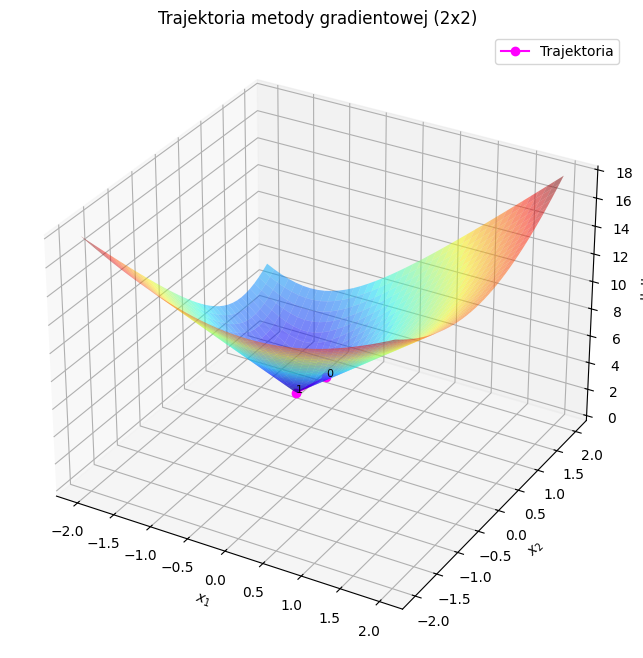

In [69]:
A = np.array([[1,5],[5,1]])
b = np.array([4,-4])

plot3d(A, b)

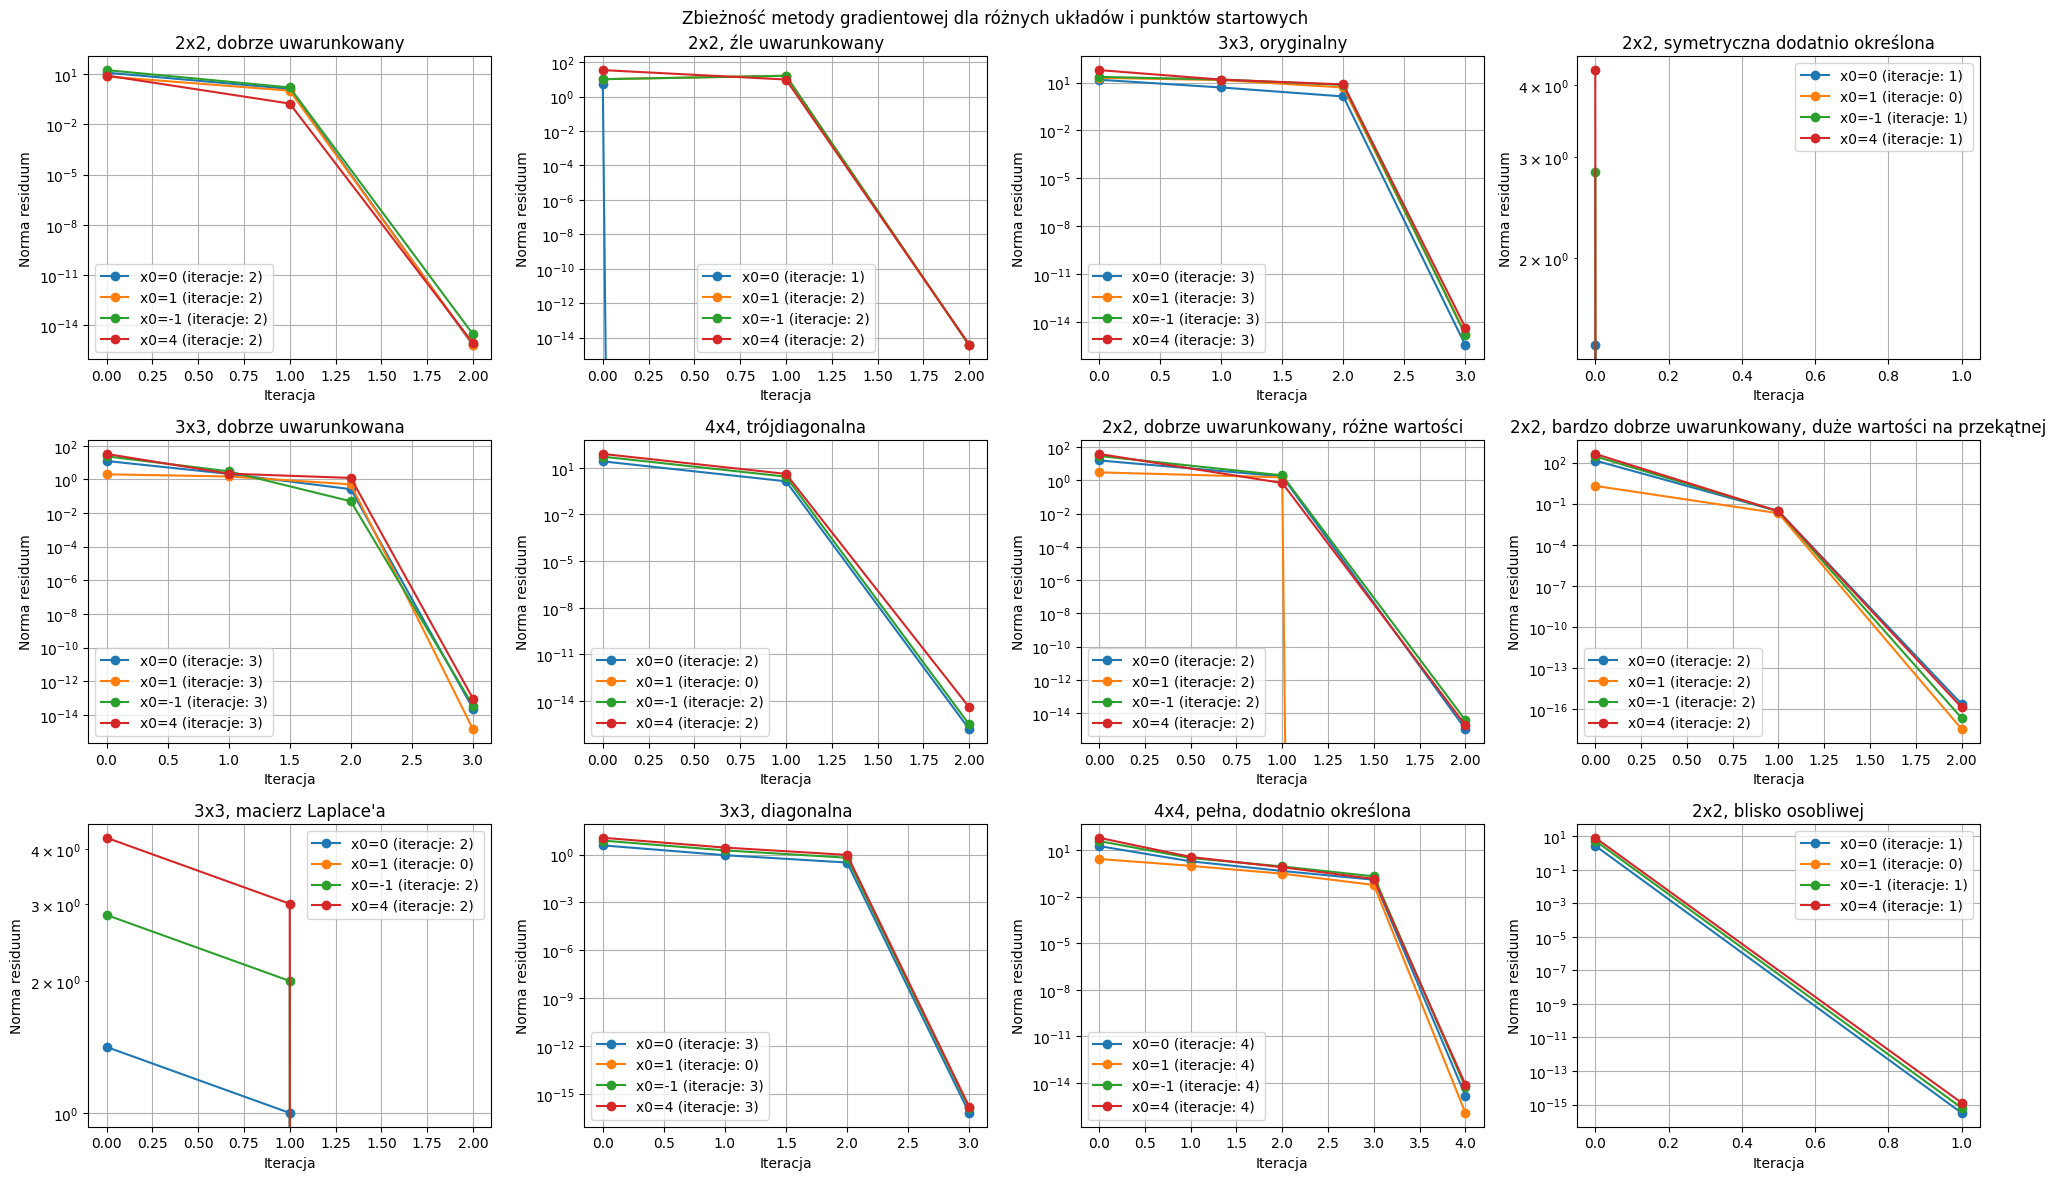

In [70]:
systems = [
    {"A": np.array([[3, 1], [1, 2]]), "b": np.array([9, 8]), "desc": "2x2, dobrze uwarunkowany"},
    {"A": np.array([[1, 5], [5, 1]]), "b": np.array([4, -4]), "desc": "2x2, źle uwarunkowany"},
    {"A": np.array([[4, 2, -1], [2, 5, 2], [-1, 2, 10]]), "b": np.array([12, -8, 4]), "desc": "3x3, oryginalny"},
    {"A": np.array([[2, -1], [-1, 2]]), "b": np.array([1, 1]), "desc": "2x2, symetryczna dodatnio określona"},
    {"A": np.array([[6, 2, 1], [2, 3, 1], [1, 1, 1]]), "b": np.array([9, 8, 3]), "desc": "3x3, dobrze uwarunkowana"},
    {"A": np.array([[10, 2, 0, 0], [2, 10, 2, 0], [0, 2, 10, 2], [0, 0, 2, 10]]), "b": np.array([12, 14, 14, 12]), "desc": "4x4, trójdiagonalna"},
    {"A": np.array([[7, 3], [3, 6]]), "b": np.array([10, 12]), "desc": "2x2, dobrze uwarunkowany, różne wartości"},
    {"A": np.array([[100, 1], [1, 100]]), "b": np.array([101, 99]), "desc": "2x2, bardzo dobrze uwarunkowany, duże wartości na przekątnej"},
    {"A": np.array([[2, -1, 0], [-1, 2, -1], [0, -1, 2]]), "b": np.array([1, 0, 1]), "desc": "3x3, macierz Laplace'a"},
    {"A": np.array([[1, 0, 0], [0, 2, 0], [0, 0, 3]]), "b": np.array([1, 2, 3]), "desc": "3x3, diagonalna"},
    {"A": np.array([[5, 2, 1, 0], [2, 6, 2, 1], [1, 2, 7, 2], [0, 1, 2, 8]]), "b": np.array([8, 9, 10, 11]), "desc": "4x4, pełna, dodatnio określona"},
    {"A": np.array([[1, 0.9], [0.9, 1]]), "b": np.array([1.9, 1.9]), "desc": "2x2, blisko osobliwej"}
]

def gradient_with_trace(A, b, x0=None, tol=1e-10, max_iter=1000, eps=1e-8):
    A = np.array(A)
    b = np.array(b)
    n = len(b)
    if x0 is None:
        x = np.zeros(n)
    else:
        x = np.array(x0)
    
    r = b - A @ x
    w = r.copy()
    res = [np.linalg.norm(r)]
    
    for _ in range(max_iter):
        if np.linalg.norm(r) < tol:
            break
            
        z = A @ w
        denom = w @ z
        if abs(denom) < eps or np.isnan(denom) or np.isinf(denom):
            break
            
        alpha = (r @ r) / denom
        x = x + alpha * w
        r_new = r - alpha * z
        r_norm_old = r @ r
        r_norm_new = r_new @ r_new
        
        if r_norm_old < eps:
            break
            
        beta = r_norm_new / r_norm_old
        w = r_new + beta * w
        
        r = r_new
        res.append(np.linalg.norm(r))
    
    return res

nrows, ncols = 3, 4
fig, axs = plt.subplots(nrows, ncols, figsize=(20, 12))
axs = axs.flatten()
for idx, sys in enumerate(systems):
    residuals_list = []
    labels = []
    x0_list = [None, np.ones_like(sys["b"]), -np.ones_like(sys["b"]), 4*np.ones_like(sys["b"])]
    x0_labels = ["x0=0", "x0=1", "x0=-1", "x0=4"]
    for x0, label in zip(x0_list, x0_labels):
        residuals = gradient_with_trace(sys["A"], sys["b"], x0=x0)
        residuals_list.append(residuals)
        labels.append(label + f" (iteracje: {len(residuals)-1})")
    for res, label in zip(residuals_list, labels):
        axs[idx].semilogy(res, marker='o', label=label)
    axs[idx].set_title(sys["desc"])
    axs[idx].set_xlabel("Iteracja")
    axs[idx].set_ylabel("Norma residuum")
    axs[idx].legend()
    axs[idx].grid(True)

for ax in axs[len(systems):]:
    ax.axis('off')

plt.suptitle("Zbieżność metody gradientowej dla różnych układów i punktów startowych")
plt.tight_layout()
plt.show()


### Wnioski dla testów metody gradientów sprzężonych na różnych macierzach i punktach początkowych
- **Metoda gradientowa** skutecznie rozwiązuje układy równań liniowych z macierzami symetrycznymi i dodatnio określonymi, co potwierdzają zgodne wyniki z funkcją `np.linalg.solve` dla wszystkich testowanych przypadków.
- **Zbieżność metody** silnie zależy od uwarunkowania macierzy – dla dobrze uwarunkowanych układów (np. 2x2, 4x4 trójdiagonalna) liczba iteracji jest bardzo mała (często 1–3), natomiast dla źle uwarunkowanych (np. macierze bliskie osobliwości, duże wartości poza przekątną) liczba iteracji rośnie, a zbieżność może być wolniejsza.
- **Wybór punktu startowego (`x0`)** wpływa na liczbę iteracji, ale nie na końcowy wynik – niezależnie od `x0` rozwiązanie jest poprawne, choć start z wartości bliższych rozwiązaniu przyspiesza zbieżność.
- Na wykresach widać, że **norma residuum maleje wykładniczo** w kolejnych iteracjach dla dobrze uwarunkowanych układów, natomiast dla źle uwarunkowanych spadek jest wolniejszy lub nieregularny.
- W przypadku **większych układów (np. 4x4)** metoda gradientowa pozostaje efektywna, choć liczba iteracji może wzrosnąć, zwłaszcza przy złym uwarunkowaniu.
- **Wizualizacje trajektorii** pokazują, że metoda porusza się w kierunku rozwiązania zgodnie z kierunkiem największego spadku, a kolejne punkty zbliżają się do minimum funkcji celu.
- Dla **macierzy bliskich osobliwości** lub bardzo źle uwarunkowanych, metoda może wymagać wielu iteracji lub nawet nie osiągnąć zadanej dokładności w rozsądnym czasie.
- **W przypadku dobrze uwarunkowanych macierzy 3x3 i 4x4** liczba iteracji jest niewielka, natomiast dla źle uwarunkowanych 2x2 liczba iteracji może być większa niż dla większych, dobrze uwarunkowanych układów.
- **Metoda gradientowa** w wersji podstawowej nie wykorzystuje kierunków sprzężonych, przez co w przestrzeni o większym wymiarze lub przy złym uwarunkowaniu może wykonywać więcej kroków zanim osiągnie optimum. Dla takich przypadków znacznie szybciej działa metoda gradientów sprzężonych.

### Porównanie metody gradientów sprzężonych z metodami Gaussa-Seidel'a oraz gradientów prostych
Do porównania wykorzystane są użyte podane przy punkcie poprzednim różne typy macierzy, a także pseudolosowe macierze większe, pozwalające na obserwację wyników przy większej wymaganej ilości iteracji.

C:\Users\szepiet33\AppData\Local\Temp\ipykernel_40600\3349519619.py:16: RuntimeWarning: invalid value encountered in matmul
  res.append(np.linalg.norm(b - A @ x_new))
C:\Users\szepiet33\AppData\Local\Temp\ipykernel_40600\3349519619.py:17: RuntimeWarning: invalid value encountered in subtract
  if np.linalg.norm(x_new - x) < tol:
C:\Users\szepiet33\AppData\Local\Temp\ipykernel_40600\3349519619.py:33: RuntimeWarning: invalid value encountered in scalar divide
  alpha = (r @ r) / (r @ (A @ r))


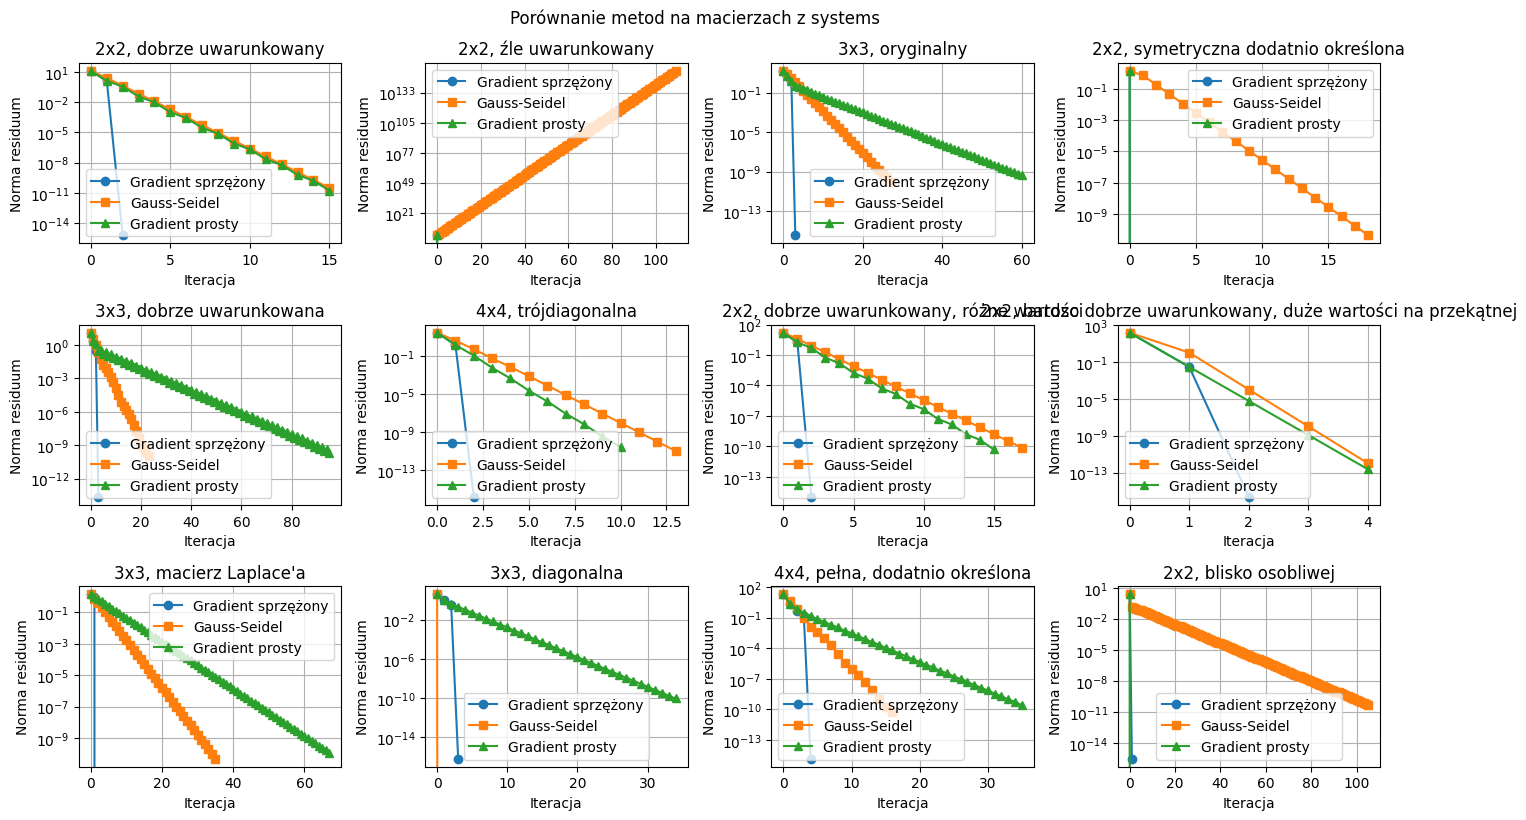

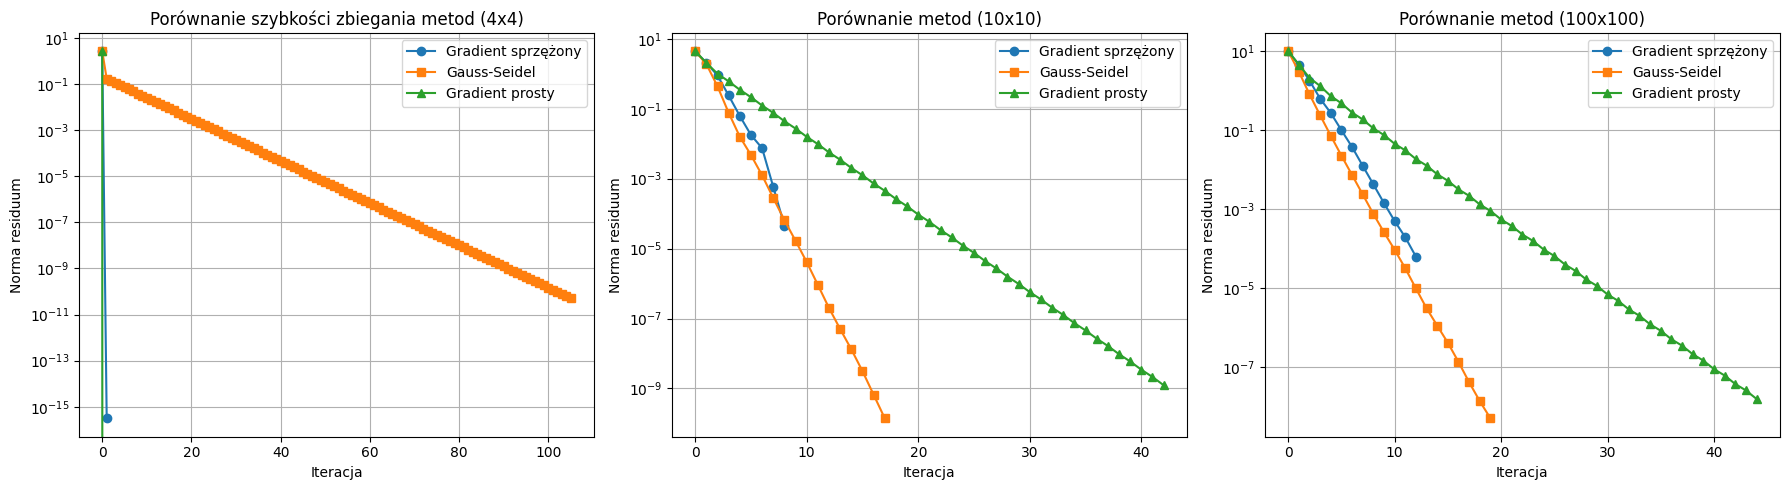

: 

In [ ]:
def gauss_seidel(A, b, x0=None, tol=1e-10, max_iter=1000):
    A = np.array(A, dtype=float)
    b = np.array(b, dtype=float)
    n = len(b)
    if x0 is None:
        x = np.zeros(n)
    else:
        x = np.array(x0, dtype=float)
    res = [np.linalg.norm(b - A @ x)]
    for _ in range(max_iter):
        x_new = x.copy()
        for i in range(n):
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i+1:], x[i+1:])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        res.append(np.linalg.norm(b - A @ x_new))
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return res

def simple_gradient(A, b, x0=None, tol=1e-10, max_iter=1000):
    A = np.array(A)
    b = np.array(b)
    n = len(b)
    if x0 is None:
        x = np.zeros(n)
    else:
        x = np.array(x0)
    res = [np.linalg.norm(b - A @ x)]
    for _ in range(max_iter):
        r = b - A @ x
        alpha = (r @ r) / (r @ (A @ r))
        x_new = x + alpha * r
        res.append(np.linalg.norm(b - A @ x_new))
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return res

# Test na macierzach z systems
plt.figure(figsize=(14, 8))
for idx, sys in enumerate(systems):
    res_grad = gradient_with_trace(sys["A"], sys["b"])
    res_gs = gauss_seidel(sys["A"], sys["b"])
    res_simple_grad = simple_gradient(sys["A"], sys["b"])
    plt.subplot(3, 4, idx + 1)
    plt.semilogy(res_grad, marker='o', label='Gradient sprzężony')
    plt.semilogy(res_gs, marker='s', label='Gauss-Seidel')
    plt.semilogy(res_simple_grad, marker='^', label='Gradient prosty')
    plt.title(sys["desc"])
    plt.xlabel('Iteracja')
    plt.ylabel('Norma residuum')
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.suptitle("Porównanie metod na macierzach z systems", y=1.02)
plt.show()

# Przykład porównania na większym układzie (4x4)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 4x4
axes[0].semilogy(res_grad, marker='o', label='Gradient sprzężony')
axes[0].semilogy(res_gs, marker='s', label='Gauss-Seidel')
axes[0].semilogy(res_simple_grad, marker='^', label='Gradient prosty')
axes[0].set_xlabel('Iteracja')
axes[0].set_ylabel('Norma residuum')
axes[0].set_title('Porównanie szybkości zbiegania metod (4x4)')
axes[0].legend()
axes[0].grid(True)

# 10x10
axes[1].semilogy(res_grad_10, marker='o', label='Gradient sprzężony')
axes[1].semilogy(res_gs_10, marker='s', label='Gauss-Seidel')
axes[1].semilogy(res_simple_grad_10, marker='^', label='Gradient prosty')
axes[1].set_xlabel('Iteracja')
axes[1].set_ylabel('Norma residuum')
axes[1].set_title('Porównanie metod (10x10)')
axes[1].legend()
axes[1].grid(True)

# 100x100
axes[2].semilogy(res_grad_100, marker='o', label='Gradient sprzężony')
axes[2].semilogy(res_gs_100, marker='s', label='Gauss-Seidel')
axes[2].semilogy(res_simple_grad_100, marker='^', label='Gradient prosty')
axes[2].set_xlabel('Iteracja')
axes[2].set_ylabel('Norma residuum')
axes[2].set_title('Porównanie metod (100x100)')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()


### Wnioski na podstawie wyników porównania metod iteracyjnych

- **Metoda gradientów sprzężonych** (gradient sprzężony) jest zdecydowanie najszybsza spośród testowanych metod – w większości przypadków osiąga bardzo małą normę residuum już po kilku iteracjach, niezależnie od rozmiaru i uwarunkowania macierzy.
- **Metoda Gaussa-Seidla** jest wolniejsza od gradientów sprzężonych, ale wciąż wykazuje stabilną i monotoniczną zbieżność. Liczba iteracji rośnie wraz z rozmiarem układu i pogorszeniem uwarunkowania macierzy.
- **Prosty gradient** (gradient prosty) jest najmniej efektywny – dla dobrze uwarunkowanych macierzy zbiega, ale wymaga znacznie więcej iteracji. Dla źle uwarunkowanych układów lub macierzy bliskich osobliwości może nie zbiegać wcale lub zbiega bardzo wolno.
- **Uwarunkowanie macierzy** silnie wpływa na szybkość zbieżności wszystkich metod – im gorzej uwarunkowana macierz, tym więcej iteracji potrzeba do osiągnięcia zadanej dokładności.
- **Rozmiar układu**: Dla większych macierzy (np. 10x10, 100x100) przewaga gradientów sprzężonych nad pozostałymi metodami jest jeszcze bardziej widoczna.
- **Stabilność**: Metoda gradientów sprzężonych i Gaussa-Seidla są stabilne nawet dla większych układów, natomiast prosty gradient może generować błędy numeryczne (np. NaN) przy złym uwarunkowaniu.
- **Wybór metody**: Dla dużych, rzadkich i dobrze uwarunkowanych układów najlepiej sprawdza się gradient sprzężony. Gauss-Seidel jest dobrym kompromisem dla mniejszych układów lub gdy nie można zastosować gradientów sprzężonych. Prosty gradient ma sens tylko dla bardzo prostych, dobrze uwarunkowanych układów.


### Wnioski ostateczne
W praktyce, dla rozwiązywania dużych układów równań liniowych z macierzami symetrycznymi i dodatnio określonymi, metoda gradientów sprzężonych jest najbardziej efektywna i powinna być preferowana. Wybór punktu startowego ma drugorzędne znaczenie dla poprawności rozwiązania, ale może wpływać na liczbę iteracji.